![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com//github/JohnSnowLabs/nlu/blob/master/examples/collab/Embeddings_for_Words/NLU_COVIDBERT_Word_Embeddings_and_t-SNE_visualization_example.ipynb)

# COVIDBERT Word Embeddings with NLU 

BERT (Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture.

This Bert model was fine-tuned on a COVID dataset


## Sources :
- https://arxiv.org/abs/1810.04805
- https://github.com/google-research/bert

## Paper abstract

We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers. Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. BERT is conceptually simple and empirically powerful. It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE score to 80.5% (7.7% point absolute improvement), MultiNLI accuracy to 86.7% (4.6% absolute improvement), SQuAD v1.1 question answering Test F1 to 93.2 (1.5 point absolute improvement) and SQuAD v2.0 Test F1 to 83.1 (5.1 point absolute improvement).


# 1. Install Java and NLU

In [ ]:

import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu > /dev/null    

## 2. Load Model and embed sample string with COVIDBERT

In [ ]:
import nlu
pipe = nlu.load('covidbert')
pipe.predict('He was suprised by the diversity of NLU')

covidbert_large_uncased download started this may take some time.
Approximate size to download 1.2 GB
[OK!]


,token,covidbert_embeddings
origin_index,,
0,He,"[-0.8376068472862244, -1.3350070714950562, 1.1..."
0,was,"[0.13941092789173126, -1.2634986639022827, 0.9..."
0,suprised,"[1.0169570446014404, -0.8838109970092773, 0.35..."
0,by,"[0.21072447299957275, -0.6737843155860901, -0...."
0,the,"[0.04708617925643921, -0.7894992828369141, -0...."
0,diversity,"[0.14055517315864563, -0.45543643832206726, 0...."
0,of,"[0.25242406129837036, -0.4807623326778412, -0...."
0,NLU,"[-0.3696652054786682, -1.7695058584213257, -0...."


# 3. Download Sample dataset
We will load a dataset with medical text in it

In [ ]:
import pandas as pd
# Download the dataset 
# ! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp
! wget -N https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_clinical_rel_dataset.csv -P /tmp
# Load dataset to Pandas
df = pd.read_csv('/tmp/i2b2_clinical_rel_dataset.csv')
df

--2020-11-19 09:17:18--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/i2b2_clinical_rel_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285456 (279K) [text/plain]
Saving to: ‘/tmp/i2b2_clinical_rel_dataset.csv’

i2b2_clinical_rel_d 100%[===================>] 278.77K  --.-KB/s    in 0.05s   

Last-modified header missing -- time-stamps turned off.
2020-11-19 09:17:18 (5.23 MB/s) - ‘/tmp/i2b2_clinical_rel_dataset.csv’ saved [285456/285456]



,dataset,source,txt_file,sentence,sent_id,chunk1,begin1,end1,rel,chunk2,begin2,end2,label1,label2,lastCharEnt1,firstCharEnt1,lastCharEnt2,firstCharEnt2,words_in_ent1,words_in_ent2,words_between
0,test,beth+partners,i2b2 2010 VA/test_data/0150.txt,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...",44,respiratory rate,12,13,O,saturation,17,17,test,test,64,49,84,75,2,1,3
1,test,beth+partners,i2b2 2010 VA/test_data/0057.txt,"No lotions , creams or powders to incisions .",146,lotions,1,1,TrNAP,incisions,7,7,treatment,problem,9,3,42,34,1,1,5
2,train,partners,i2b2 2010 VA/concept_assertion_relation_traini...,Because of expected long term antibiotic admin...,43,expected long term antibiotic administration,2,6,O,a picc line,8,10,treatment,treatment,54,11,68,58,5,3,1
3,train,partners,i2b2 2010 VA/concept_assertion_relation_traini...,She states this light-headedness is often asso...,21,light-headedness,3,3,PIP,diaphoresis,12,12,problem,problem,31,16,92,82,1,1,8
4,test,beth+partners,i2b2 2010 VA/test_data/0457.txt,Initial electrocardiogram showed a normal sinu...,61,an inferior and right ventricular infarction,38,43,PIP,1-mm st depressions in i and avl,28,34,problem,problem,239,196,176,145,6,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,test,beth+partners,i2b2 2010 VA/test_data/0113.txt,2013-09-25 02:54 AM BLOOD Type - ART pO2 - 64 ...,61,ph,15,15,O,caltco2,19,19,test,test,61,60,78,72,1,1,3
996,train,beth,i2b2 2010 VA/concept_assertion_relation_traini...,"Neuro : no asterixis , CN II-XII intact , 5/5 ...",59,lt,15,15,O,asterixis,3,3,test,problem,82,81,19,11,1,1,11
997,train,beth,i2b2 2010 VA/concept_assertion_relation_traini...,"Blood pressure 156/67 , pulse 80 and respirato...",41,pulse,4,4,O,respiratory rate,7,8,test,test,28,24,52,37,1,2,2
998,test,beth+partners,i2b2 2010 VA/test_data/0330.txt,"White blood cell count is 7.65 , hematocrit of...",49,platelets,11,11,O,hematocrit,7,7,test,test,62,54,42,33,1,1,3


# 3.1 Visualize Embeddings with T-SNE




Lets add Sentiment Part Of Speech to our pipeline because its so easy and so we can hue our T-SNE plots by POS and Sentiment       

In [ ]:
pipe = nlu.load('sentiment covidbert pos') 
df['text'] = df['sentence']

# We must set output level to token since NLU will infer a different output level for this pipeline composition
predictions = pipe.predict(df[['text','label1']].iloc[0:250], output_level='token')
predictions

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]
covidbert_large_uncased download started this may take some time.
Approximate size to download 1.2 GB
[OK!]
pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


,label1,pos,sentiment_confidence,text,covidbert_embeddings,sentiment,token,checked
origin_index,,,,,,,,
0,test,NNP,0.548500,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...","[1.3431992530822754, 0.46571803092956543, -0.6...",negative,VITAL,VITA
0,test,NNP,0.548500,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...","[0.49683600664138794, 0.5583184361457825, 0.92...",negative,SIGNS,SIGN
0,test,:,0.548500,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...","[-0.30578911304473877, 0.21396516263484955, 1....",negative,-,-
0,test,NNP,0.548500,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...","[1.062239170074463, 0.33285313844680786, 1.114...",negative,Temp,Temp
0,test,CD,0.548500,"VITAL SIGNS - Temp 98.8 , pulse 60 , BP 150/94...","[0.3196234703063965, -0.3610575497150421, 0.29...",negative,98.8,98.8
...,...,...,...,...,...,...,...,...
249,treatment,",",0.565800,"Pain 2/10 persisted , relieved by MSO4 .","[0.23473015427589417, -0.06431414186954498, 1....",negative,",",","
249,treatment,VBN,0.565800,"Pain 2/10 persisted , relieved by MSO4 .","[1.4050366878509521, -0.08336023986339569, 0.7...",negative,relieved,relieved
249,treatment,IN,0.565800,"Pain 2/10 persisted , relieved by MSO4 .","[0.32300248742103577, 0.2576269805431366, 0.66...",negative,by,by


## 3.2 Checkout sentiment distribution

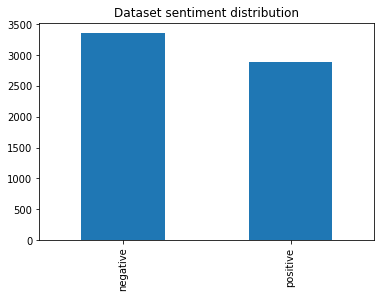

In [ ]:
# Some Tokens are None which we must drop first
predictions.dropna(how='any', inplace=True)
# Some sentiment are 'na' which we must drop first
predictions = predictions[predictions.sentiment!= 'na']
predictions.sentiment.value_counts().plot.bar(title='Dataset sentiment distribution')

# 4.Prepare data for T-SNE algorithm.
We create a Matrix with one row per Embedding vector for T-SNE algorithm

In [ ]:
import numpy as np

# We first create a column of type np array
# Make a matrix from the vectors in the np_array column via list comprehension
mat = np.matrix([x for x in predictions.covidbert_embeddings])
mat.shape

(6242, 1024)

## 4.1 Fit and transform T-SNE algorithm


In [ ]:

from sklearn.manifold import TSNE
model = TSNE(n_components=2) #n_components means the lower dimension
low_dim_data = model.fit_transform(mat)
print('Lower dim data has shape',low_dim_data.shape)

Lower dim data has shape (6242, 2)


### Set plotting styles

In [ ]:
# set some styles for for Plotting
import seaborn as sns
# Style Plots a bit
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1,rc={"lines.linewidth": 2.5})

%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 14)


# 6.1 Plot low dimensional T-SNE COVIDBERT embeddings with hue for POS


Text(0.5, 1.0, 'T-SNE COVIDBERT Embeddings, colored by Part of Speech Tag')

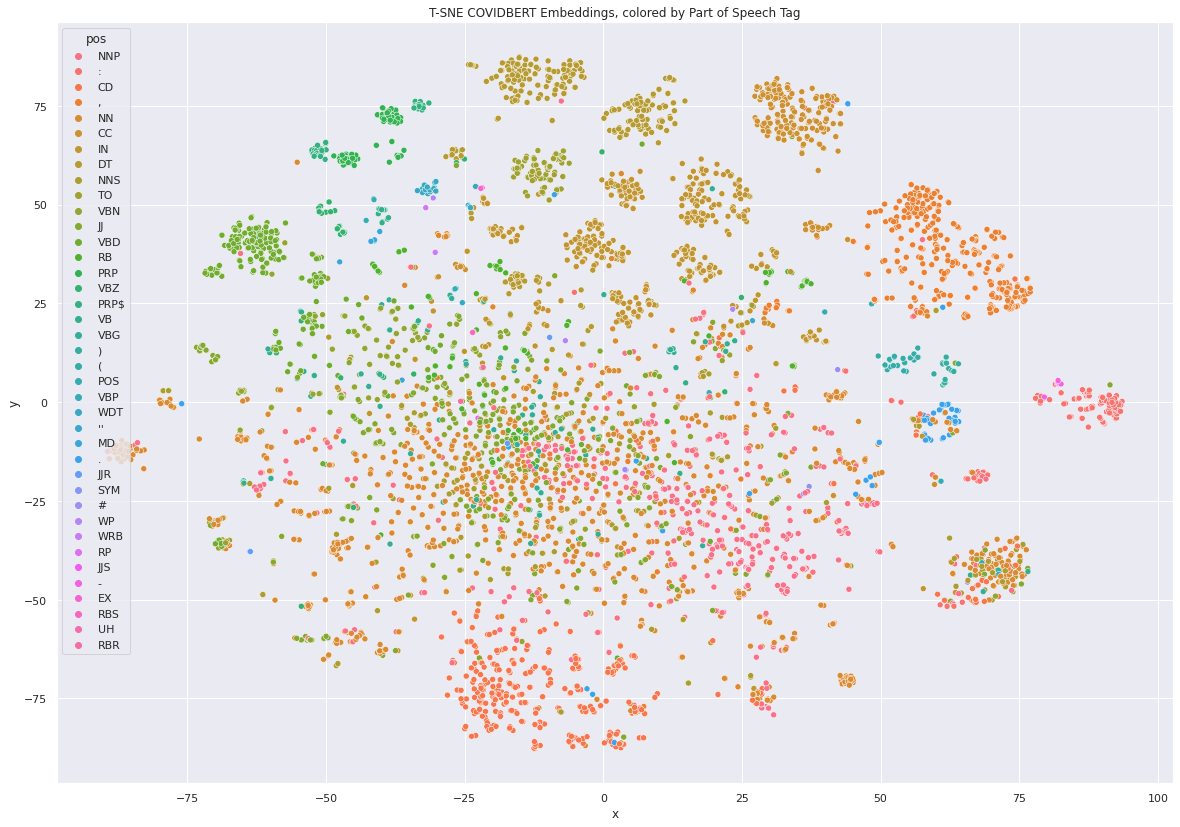

In [ ]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.pos)
tsne_df.columns =['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE COVIDBERT Embeddings, colored by Part of Speech Tag')


##6.2 Plot low dimensional T-SNE COVIDBERT embeddings with hue for Sarcasm


In [12]:
predictions.label1.value_counts()

test         2477
treatment    2372
problem      1393
Name: label1, dtype: int64

Text(0.5, 1.0, 'T-SNE COVIDBERT Embeddings, colored by Sarcasm label')

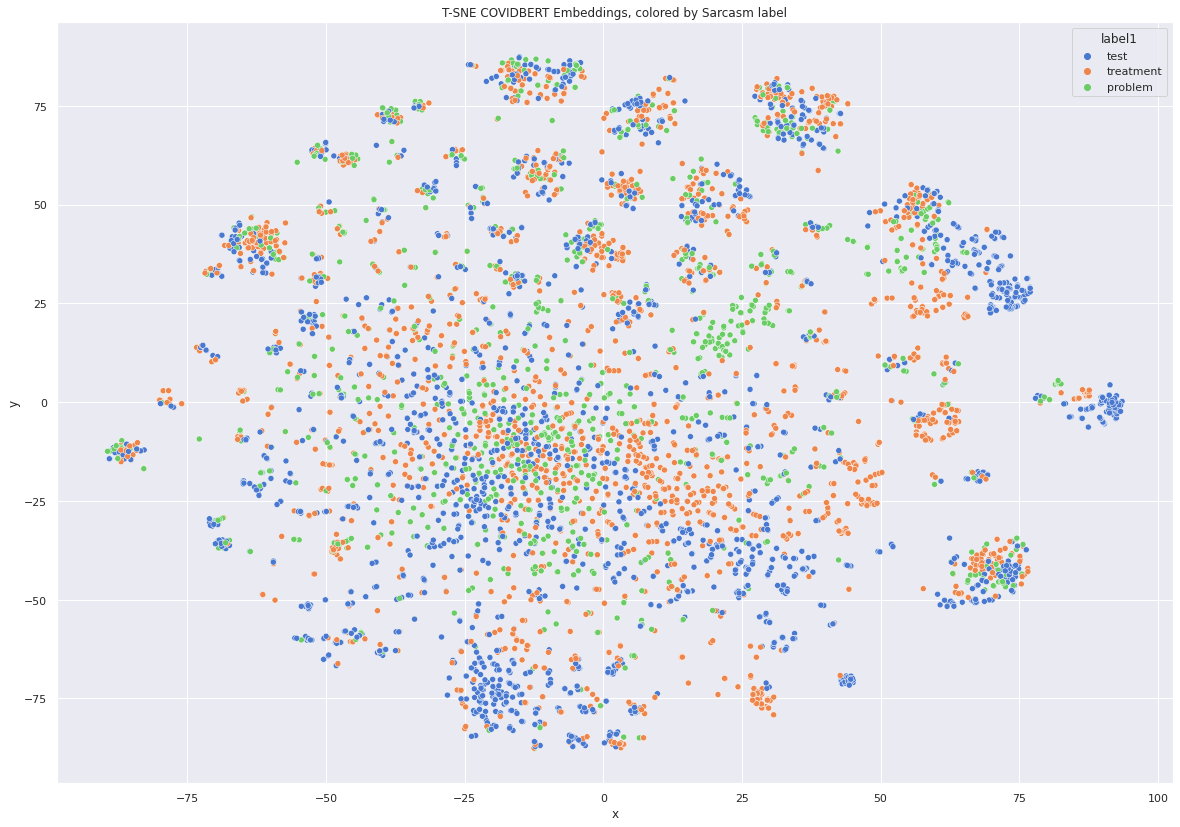

In [14]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.label1.replace({2: 'problem' , 1:'test',0:'treatment'}))
tsne_df.columns =['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE COVIDBERT Embeddings, colored by Sarcasm label')


## 6.3 Plot low dimensional T-SNE COVIDBERT embeddings with hue for Sentiment


Text(0.5, 1.0, 'T-SNE COVIDBERT Embeddings, colored by Sentiment')

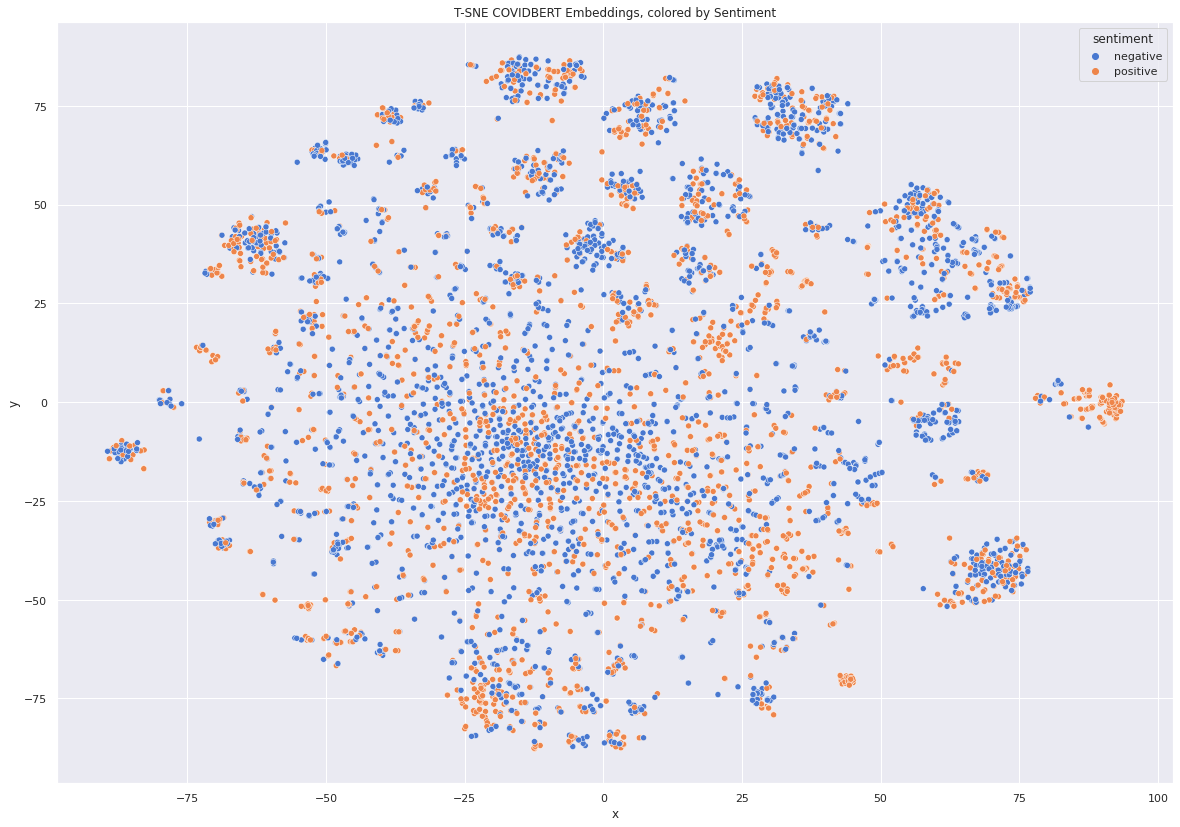

In [15]:
tsne_df =  pd.DataFrame(low_dim_data, predictions.sentiment)
tsne_df.columns =['x','y']
ax = sns.scatterplot(data=tsne_df, x='x', y='y', hue=tsne_df.index)
ax.set_title('T-SNE COVIDBERT Embeddings, colored by Sentiment')


# 7. NLU has many more embedding models!      
Make sure to try them all out!       
You can change 'covidbert' in nlu.load('covidbert') to bert, xlnet, albert or any other of the **100+ word embeddings** offerd by NLU

In [ ]:
nlu.print_all_model_kinds_for_action('embed')